# Tema 3: Detectar vehículos

Con el fondo eliminado, ahora se puede aplicar un contador sobre las siluetas.

Se importan las bilbiotecas.

In [2]:
import matplotlib.pyplot as plt
import cv2

## Detectar siluetas

La detección de siluetas se debe realizar sobre una imagen como esta:

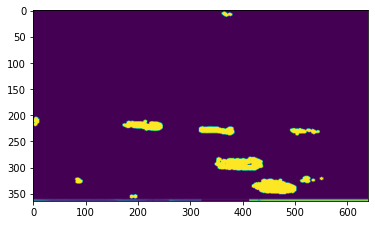

In [28]:
img = cv2.imread('imagenes/autos.PNG',cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

OpenCv cuenta con una función llamada `findContours` que arroja una serie de listas que permiten localizar los objetos dentro de la imagen.

In [4]:
contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_L1)

La lista `contours` contiene los datos de las siluetas. Al parecer, existen doce contornos detectados en la imagen superior.

In [16]:
len(contours)

12

Se importa la imagen original para poder dibujar la detección de objetos.

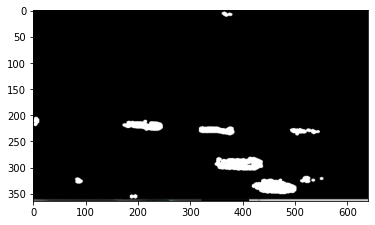

In [31]:
img_or = cv2.imread('imagenes/autos.PNG')
img_or = cv2.cvtColor(img,cv2.cv2.COLOR_BGR2RGB)
plt.imshow(img_or)

A pesar de ser una imagen en blanco y negro, puede verse que se importó con tres canales para el color.

In [32]:
img_or.shape

(364, 640, 3)

Los datos devueltos por la función `findContours` pueden ser utilizados para dibujar rectángulos con facilidad gracias a otra función de OpenCv llamada `boundingRect`.

In [42]:
rectangulos = []
for cn in contours:
    #se obtienen rectágulos
    (x, y, w, h) = cv2.boundingRect(cn)
    #dibuja un rectángulo
    cv2.rectangle(img_or, (x,y), (x+w,y+h), (0, 128, 0), 3)
    rectangulos.append((x, y, w, h))

Se puede ver la detección de vehículos sobre la imagen original.

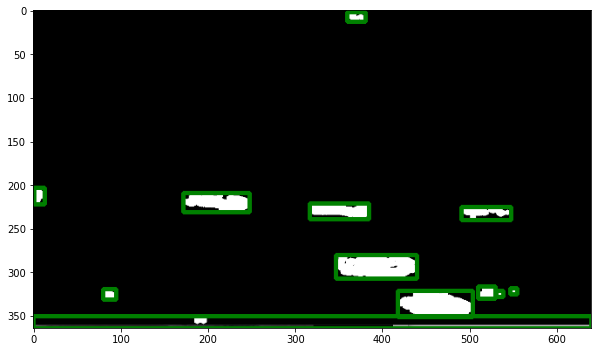

In [40]:
plt.figure(figsize=(10,10))
plt.imshow(img_or)

Esta detección básica de objetos se utiliza en la función [detect_vehicles](../funciones/detect_vehicles.py) combinada con un filtro de acuerdo al tamaño. 

## Clasificar los vehículos

Se utiliza la altura y el ancho para clasificar los rectángulos entre vehículos pesados y ligeros.

In [44]:
rectangulos[0]

(0, 350, 640, 14)

Hay que tomar en cuenta que cada rectángulo cuenta con la información `w`,`h` en la posición 2 y 3 de la tupla.

In [51]:
pesados = []
for rectangulo in rectangulos:
    if(rectangulo[2]>=50 and rectangulo[3]>=20):
        pesados.append(rectangulo)

Se consiguen los vehículos pesados y se dibujan los rectángulos en la imagen original para diferenciar.

In [52]:
for pesado in pesados:
    #se obtienen rectágulos
    (x, y, w, h) = pesado
    #dibuja un rectángulo
    cv2.rectangle(img_or, (x,y), (x+w,y+h), (255, 0, 0), 3)
    rectangulos.append((x, y, w, h))

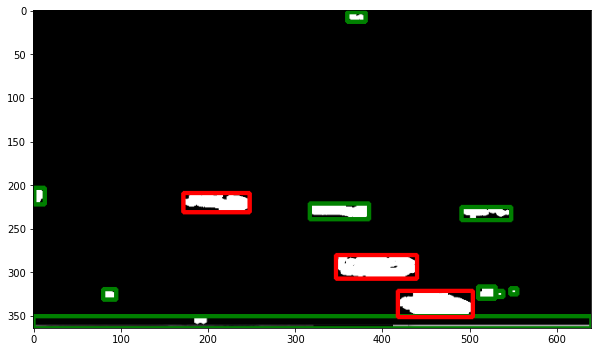

In [53]:
plt.figure(figsize=(10,10))
plt.imshow(img_or)

Esta función encuentra los vehículos que hay en un frame, así que es necesario darle seguimiento a cada vehículo con otra función para lograr el conteo.